In [1]:
import numpy as np
import pandas as pd
import adafdr.method as md
import adafdr.data_loader as dl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# fMRI: auditory

In [2]:
data_path = '/data3/martin/AdaFDRpaper_data'
file_path = data_path + '/fmri/fmri_auditory'
df_fmri = pd.read_csv(file_path, sep=',')
p = df_fmri['p_val'].as_matrix()
x = df_fmri['B_label'].as_matrix()
print('p:', p.shape)
print('x:', x.shape)

p: (56682,)
x: (56682,)


## covariate visualization

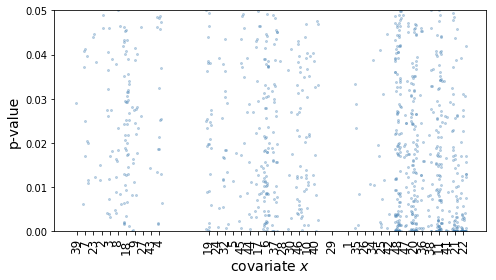

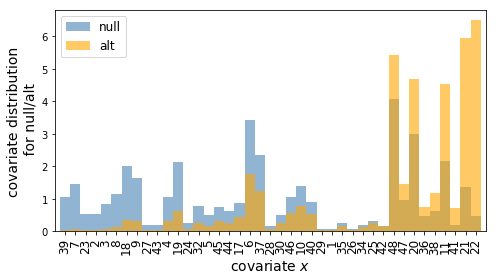

In [3]:
md.adafdr_explore(p, x, output_folder=None, figsize=[7,4])

## Hypothesis testing

In [4]:
# Baseline methods: BH, SBH
alpha = 0.1
n_rej, t_rej = md.bh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for BH: %d'%n_rej)
n_rej, t_rej, pi0_hat = md.sbh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for SBH: %d'%n_rej)
res = md.adafdr_test(p, x, alpha=alpha, fast_mode=True, single_core=False)
n_rej = res['n_rej']
t_rej = res['threshold']
print('# number of discoveries for adafdr: %d'%np.sum(p<=t_rej))

# number of discoveries for BH: 888
# number of discoveries for SBH: 888
# number of discoveries for adafdr: 1045


### R methods

In [5]:
%%bash -s "$file_path" "$alpha"
Rscript analysis_fmri.R $1 $2

[1] "data_path: /data3/martin/AdaFDRpaper_data/fmri/fmri_auditory"
[1] "alpha: 0.1"
[1] "Loading the data"
alpha = 1: FDPhat 1, Number of Rej. 769
alpha = 0.99: FDPhat 0.9894, Number of Rej. 758
alpha = 0.98: FDPhat 0.9794, Number of Rej. 727
alpha = 0.97: FDPhat 0.9699, Number of Rej. 698
alpha = 0.96: FDPhat 0.9595, Number of Rej. 692
alpha = 0.95: FDPhat 0.9492, Number of Rej. 689
alpha = 0.94: FDPhat 0.9385, Number of Rej. 667
alpha = 0.93: FDPhat 0.9292, Number of Rej. 664
alpha = 0.92: FDPhat 0.9187, Number of Rej. 664
alpha = 0.91: FDPhat 0.9085, Number of Rej. 612
alpha = 0.9: FDPhat 0.8997, Number of Rej. 598
alpha = 0.89: FDPhat 0.8883, Number of Rej. 591
alpha = 0.88: FDPhat 0.8784, Number of Rej. 551
alpha = 0.87: FDPhat 0.8686, Number of Rej. 510
alpha = 0.86: FDPhat 0.8594, Number of Rej. 505
alpha = 0.85: FDPhat 0.85, Number of Rej. 480
alpha = 0.84: FDPhat 0.8391, Number of Rej. 460
alpha = 0.83: FDPhat 0.8286, Number of Rej. 455
alpha = 0.82: FDPhat 0.8186, Number of R

Loading required package: nlme
This is mgcv 1.8-24. For overview type 'help("mgcv-package")'.
At test #: 10000
At test #: 20000
At test #: 30000
At test #: 40000
At test #: 50000
